In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
from utils_plot import load_dummy_model, plot_latent, plot_latent_nolabel

In [83]:
vae = load_dummy_model()
data0 = torch.rand(16, 256, 130, 1)
data1 = torch.rand(16, 256, 130, 1)

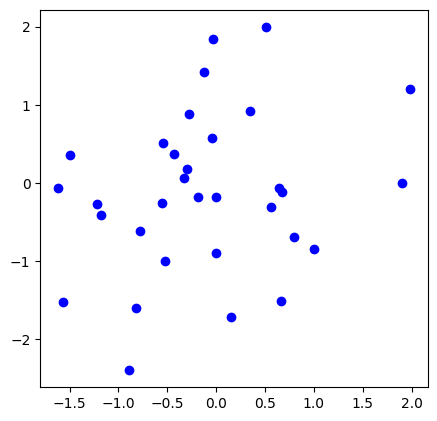

In [84]:
plot_latent_nolabel(vae, [data0, data1] )